In [6]:
from math import sqrt

class LinearRegression:
  def __init__(self,datapoints):
    self.datapoints = datapoints
    self.n = len(datapoints)

    X,Y = self.get_feature_vectors()
    pearson = self.get_pearson_coefficient(X,Y)
    b0,b1 = self.train(X,Y,pearson)
    r2 = self.getR2score(X,Y,b0,b1)
    self.plot_graph(X,Y,b0,b1)
  
  def get_feature_vectors(self):
    print('Getting feature vectors....')
    X=[]
    Y=[]

    for datapoint in self.datapoints:
      x,y = datapoint
      #upper and lower bound for x
      assert x>=0
      assert x<=16
      assert type(x)==int

      #upper and lower bound for y
      assert y>=0
      assert y<=100
      assert type(y)==int
      
      X.append(x)
      Y.append(y)
    
    print('X = ',X)
    print('Y = ',Y)
    
    return X,Y
  
  def get_pearson_coefficient(self,X,Y):
    print('\nCompute Karl Pearson\'s Coefficient\n===========')

    sum_x = sum(X)
    sum_y = sum(Y)
    m = len(X)
    sum_xy = 0
    sum_x2 = 0
    sum_y2 = 0
    for x,y in zip(X,Y):
      sum_xy += (x*y)
      sum_x2 += (x*x)
      sum_y2 += (y*y)
    numerator = m*sum_xy - sum_x*sum_y
    denominator = sqrt(m*sum_x2-(sum_x*sum_x))*sqrt(m*sum_y2-(sum_y*sum_y))
    pearson = numerator/denominator

    assert pearson>=-1
    assert pearson<=1

    print('Karl Pearson\'s Coefficient Correlation = {pearson}'.format(pearson=pearson))
    if pearson < -0.5:
      print('Strong Negative Correlation')
    elif pearson < 0:
      print('Weak Negative Correlation')
    elif pearson == 0:
      print('No Correlation')
    elif pearson < 0.5:
      print('Weak Positive Correlation')
    else:
      print('Strong Positive Correlation')
    return pearson
  
  def getR2score(self,X,Y,b0,b1):
    Y_mean = sum(Y)/len(Y)
    Y_dash = []
    for x,y in list(zip(X,Y)):
      Y_dash.append(b1*x+b0)
    Y_dash_mean = sum(Y_dash)/len(Y_dash)
    ssr=0
    sst=0
    for y,y_dash in list(zip(Y,Y_dash)):
      ssr+=(y_dash-Y_dash_mean)*(y_dash-Y_dash_mean)
      sst+=(y-Y_mean)*(y-Y_mean)
    return ssr/sst
  
  def train(self,X,Y,pearson):
    print('\nTraining\n===========')

    assert pearson>=0.5 or pearson<=-0.5
    print('Strong Correlation, Dataset is fit for Linear Regression')
    X_mean = sum(X)/len(X)
    Y_mean = sum(Y)/len(Y)
    b1_numerator=0
    b1_denominator=0
    for x,y in list(zip(X,Y)):
      b1_numerator+=(x-X_mean)*(y-Y_mean)
      b1_denominator+=(x-X_mean)*(x-X_mean)
    b1 =  b1_numerator/b1_denominator
    b0 = Y_mean - (b1*X_mean)
    # Weight Quantization
    b0, b1 = round(b0,6), round(b1,6)

    print("Regression Line Equation : y = {b0} + {b1}*x".format(b0=b0,b1=b1))
    
    # Return Coefficients
    return b0, b1
  
  
  def plot_graph(self,X,Y,b0,b1):

    import matplotlib.pyplot as plt

    print('\nPlot Graph\n===========')
    
    plt.scatter(X,Y,color="red", s=30)
    Y_pred = []
    for x,y in zip(X,Y):
      Y_pred.append(b0+b1*x)
      plt.annotate((x,y), (x, y))
    plt.plot(X,Y_pred, color="#0000ff")
    plt.xlabel("Number of hours spent driving (x)")
    plt.ylabel("Risk Score on a scale of 0-100 (y)")
    plt.show()

Getting feature vectors....
X =  [10, 9, 2, 15, 10, 16, 11, 16]
Y =  [95, 80, 10, 50, 45, 98, 38, 93]

Compute Karl Pearson's Coefficient
Karl Pearson's Coefficient Correlation = 0.6611314653759117
Strong Positive Correlation

Training
Strong Correlation, Dataset is fit for Linear Regression
Regression Line Equation : y = 12.584628 + 4.587899*x

Plot Graph


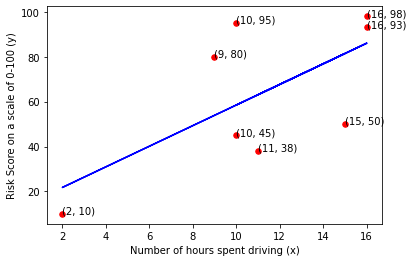

In [7]:
datapoints = [[10,95],[9,80],[2,10],[15,50],[10,45],[16,98],[11,38],[16,93]]

lr = LinearRegression(datapoints)